| **Inicio** | **atrás 12** | **Siguiente 14** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./12.Curva_ROC.ipynb)| [⏩](./14.Random_Forest.ipynb)|

# **13. Árboles de Decisión (decision trees) usando Entropía con Python**

## **Introducción**

Los árboles de decisión son una herramienta popular en el aprendizaje automático que se utiliza para modelar problemas de clasificación y regresión. La idea detrás de los árboles de decisión es construir un modelo en forma de un árbol donde cada nodo representa una pregunta y cada rama representa una posible respuesta a esa pregunta.

La entropía es una medida de la incertidumbre en un conjunto de datos. En el contexto de los árboles de decisión, la entropía se utiliza para medir la pureza de un nodo. Cuanto más puro sea un nodo, es decir, cuanto más homogéneos sean los datos que contiene, menor será su entropía.

Para construir un árbol de decisión utilizando la entropía, el algoritmo comienza dividiendo el conjunto de datos en dos o más subconjuntos utilizando una de las características (atributos) disponibles. La característica elegida es la que proporciona la mayor ganancia de información, medida como la reducción de entropía. La ganancia de información es la diferencia entre la entropía antes y después de la división. El proceso se repite recursivamente en cada subconjunto hasta que se alcanza un estado de pureza deseado o se cumple algún otro criterio de parada.

En resumen, los árboles de decisión con entropía son una técnica de aprendizaje automático para construir modelos de clasificación y regresión mediante la división recursiva de conjuntos de datos en subconjuntos cada vez más puros, utilizando la medida de entropía para determinar la ganancia de información de cada posible división.

In [13]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

A continuación, creamos un DataFrame de ejemplo con algunas variables categóricas y numéricas:

In [14]:
data = {
    'Edad': [25, 30, 20, 40, 35, 45, 25, 30, 20, 40],
    'Ingresos': ['Bajo', 'Medio', 'Medio', 'Alto', 'Medio', 'Alto', 'Bajo', 'Medio', 'Bajo', 'Medio'],
    'Genero': ['M', 'M', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'F'],
    'Calificacion': ['Mala', 'Buena', 'Buena', 'Buena', 'Mala', 'Mala', 'Mala', 'Buena', 'Mala', 'Buena']
}
df = pd.DataFrame(data)

Luego, creamos variables ```X``` e ```y``` para el modelo:

In [15]:
X = df[['Edad', 'Ingresos', 'Genero']]
y = df['Calificacion']

Codificamos cualquier variable categórica en el conjunto de datos:

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == np.object:
        X[column] = le.fit_transform(X[column])

/tmp/ipykernel_387/1172496424.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if X[column].dtype == np.object:
/tmp/ipykernel_387/1172496424.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
/tmp/ipykernel_387/1172496424.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more deta

Entrenamos el modelo de árbol de decisión:

In [17]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

Generamos la gráfica del árbol de decisión:

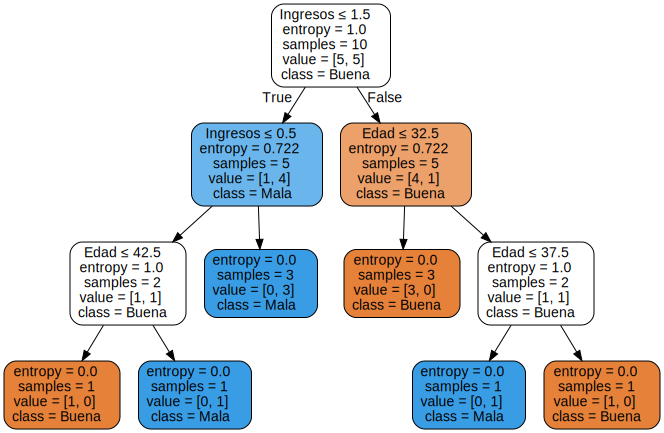

In [18]:
dot_data = export_graphviz(dtc, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['Buena', 'Mala'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)
graph

En la gráfica se puede ver cómo el árbol de decisión divide los datos en función de las variables ```Genero``` e ```Ingresos```.

## **Ejemplo de Árbol**

Los árboles de decisión son un modelo de aprendizaje supervisado que se utiliza tanto para la clasificación como para la regresión. Es un tipo de modelo que funciona creando una estructura de árbol de decisiones, donde cada nodo interno del árbol representa una pregunta o una característica de los datos, y cada rama del árbol representa una posible respuesta a esa pregunta. Los nodos hoja del árbol contienen la clase o el valor de la regresión que se predice para los datos que llegan a ese nodo.

Los árboles de decisión son fáciles de interpretar y visualizar, y pueden manejar tanto datos numéricos como categóricos. Además, son muy útiles para realizar selección de características, ya que el árbol se puede podar para eliminar características irrelevantes.

A continuación se presenta un ejemplo de cómo construir un árbol de decisión para clasificar flores según sus características.

In [22]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Entrenar un árbol de decisión
dtc = DecisionTreeClassifier()
dtc.fit(X, y)

# Exportar el árbol en formato Graphviz
dot_data = export_graphviz(dtc, out_file=None, 
                           feature_names=iris.feature_names,  
                           class_names=iris.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("../imagenes Machine_Learning/")  # guardar en archivo PDF

# Mostrar el árbol en una ventana emergente
graph.view()

'../img/iris.pdf'

Error: no "view" mailcap rules found for type "application/pdf"
Try running the update-desktop-database command. If you
don't have this command you should install the
desktop-file-utils package. This package is available from
http://freedesktop.org/wiki/Software/desktop-file-utils/
Can't call method "get_value" on an undefined value at /usr/bin/mimeopen line 159.


En este ejemplo, se utiliza el conjunto de datos `Iris`, que contiene medidas de longitud y ancho de los pétalos y sépalos de tres especies de flores. Se entrena un árbol de decisión utilizando el clasificador ```DecisionTreeClassifier``` de Scikit-learn, y se exporta el árbol en formato ```Graphviz``` utilizando la función ```export_graphviz```. El árbol resultante se guarda en un archivo PDF y se muestra en una ventana emergente utilizando el método ```view()``` de Graphviz.

La imagen resultante muestra el árbol de decisión entrenado, donde cada nodo interno representa una pregunta sobre una característica de las flores, y cada rama representa una respuesta posible a esa pregunta. Los nodos hoja contienen el nombre de la especie de flor correspondiente a las características que llegan a ese nodo.

En este ejemplo, se puede ver que el árbol ha identificado tres preguntas relevantes para la clasificación de las flores: el ancho del pétalo, el largo del pétalo y el largo del sépalo. Cada rama del árbol representa una posible respuesta a esas preguntas, y los nodos hoja contienen la especie de flor correspondiente a las características que llegan a ese nodo. Por ejemplo, si una flor tiene un ancho de pétalo mayor a `0.8`, entonces se clasifica como una flor de la especie `"versicolor"`.

## **Graficar datos y contexto**

Para graficar los datos y contexto de los árboles de decisión con un dataframe, podemos utilizar las librerías `matplotlib` y `seaborn` para crear gráficos y visualizaciones de nuestros datos.

Aquí hay un ejemplo de cómo graficar un árbol de decisión utilizando un conjunto de datos de Titanic:

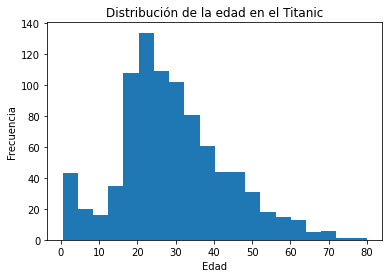

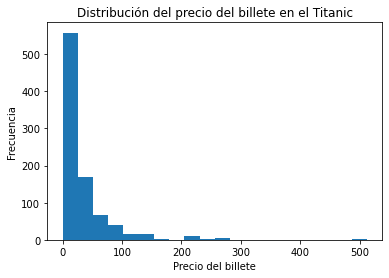

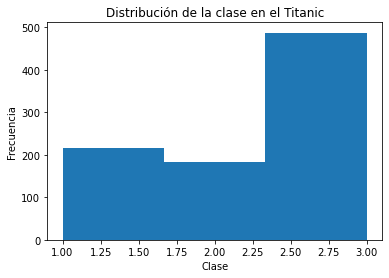

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_iris

# Cargar el dataset Titanic
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# Graficar la distribución de la edad
plt.hist(titanic['Age'].dropna(), bins=20)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la edad en el Titanic')
plt.show()

# Graficar la distribución del precio del billete
plt.hist(titanic['Fare'], bins=20)
plt.xlabel('Precio del billete')
plt.ylabel('Frecuencia')
plt.title('Distribución del precio del billete en el Titanic')
plt.show()

# Graficar la distribución de la clase
plt.hist(titanic['Pclass'], bins=3)
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Distribución de la clase en el Titanic')
plt.show()

# Seleccionar las variables que se utilizarán en el modelo
X = titanic[['Pclass', 'Age', 'Fare']]
y = titanic['Survived']

# Crear y ajustar el árbol de decisión
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtc.fit(X, y)

# Visualizar el árbol de decisión
dot_data = export_graphviz(dtc, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['No sobrevivió', 'Sobrevivió'],  
                           filled=True, rounded=True,  
                           special_characters=True) 

La salida del código anterior es una serie de gráficos que muestran la distribución de las variables en el dataset ```Titanic```, y un archivo en formato ```dot``` que contiene la estructura del árbol de decisión generado por el modelo. Para visualizar este árbol, se puede utilizar una herramienta como `Graphviz`, que permite convertir el archivo ```dot``` en un archivo de imagen. A continuación, se presenta un ejemplo de cómo convertir el archivo ```dot``` en un archivo png utilizando la librería ```graphviz```.

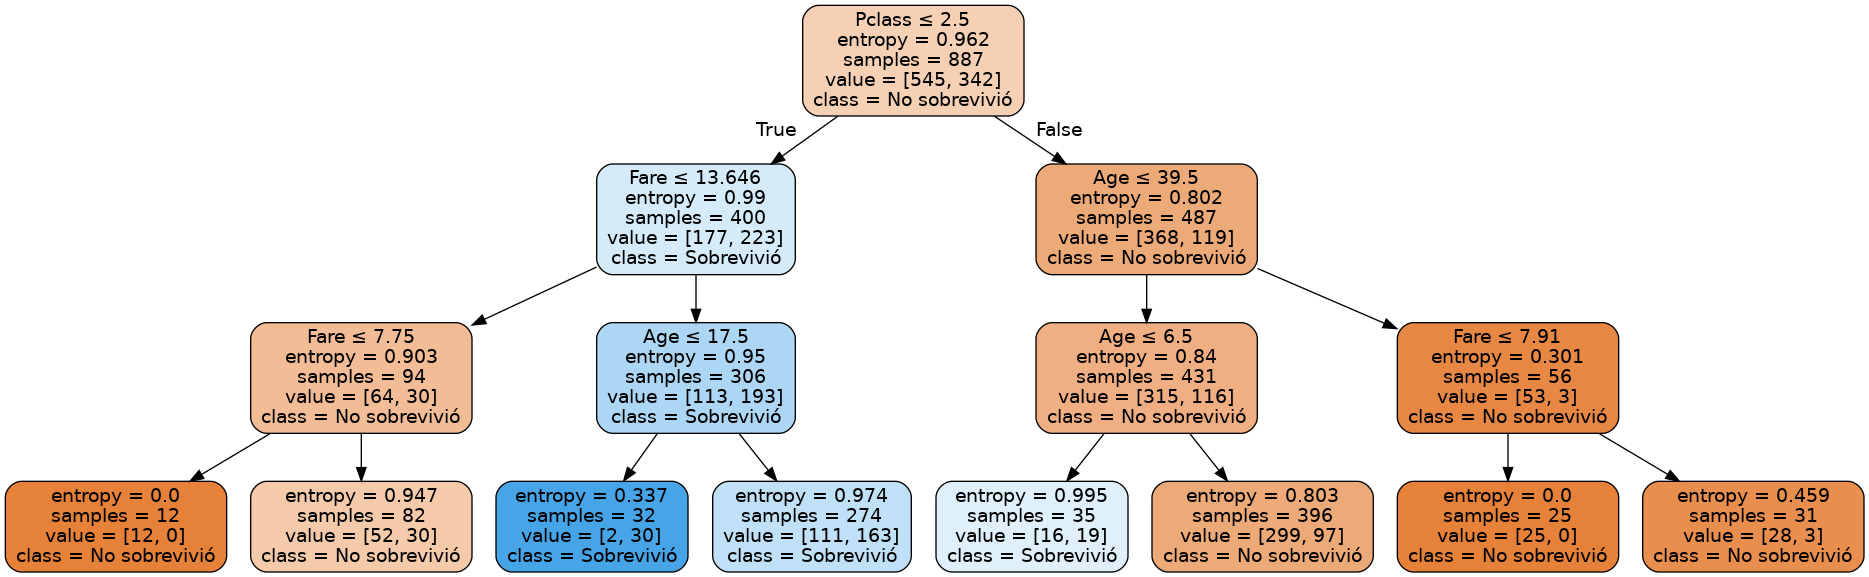

In [27]:
import graphviz
from IPython.display import Image

# Convertir el archivo dot en una imagen png
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('../imagenes Machine_Learning/titanic.png', view=True)

# Mostrar la imagen generada
Image(filename='../imagenes Machine_Learning/titanic.png')

## **Entropía**

La entropía es una medida de la incertidumbre o el desorden en un conjunto de datos. En el contexto de los árboles de decisión, la entropía se utiliza para determinar qué tan homogéneo es un conjunto de datos en términos de su variable objetivo.

La entropía se puede calcular mediante la siguiente fórmula:

```Entropía = -p1*log2(p1) - p2*log2(p2) - ... - pn*log2(pn)```

Donde ```p1, p2, ..., pn``` son las proporciones de cada una de las `n` categorías de la variable objetivo en el conjunto de datos.

Un ejemplo de entropía se puede dar en un conjunto de datos de clasificación binaria, donde la variable objetivo es una variable categórica que puede tomar dos valores: `0` o `1`. Si en un conjunto de datos el `60%` de las observaciones tienen un valor de `0` y el `40%` tienen un valor de `1`, entonces la entropía del conjunto de datos se calcularía como:

```
Entropía = -0.6*log2(0.6) - 0.4*log2(0.4)
         = 0.971
```

Esto significa que hay una gran cantidad de incertidumbre en este conjunto de datos, ya que la proporción de ambas categorías es bastante similar. En contraste, si el conjunto de datos tuviera un `90%` de observaciones con un valor de `0` y solo un `10%` con un valor de `1`, entonces la entropía se calcularía como:

```
Entropía = -0.9*log2(0.9) - 0.1*log2(0.1)
         = 0.469
```

En este caso, hay menos incertidumbre en el conjunto de datos, ya que la mayoría de las observaciones pertenecen a la categoría `0`.

Supongamos que tenemos una variable categórica `Y` con dos categorías: `"A"` y `"B"`. A continuación, se muestra el código para calcular la entropía de esta variable:

In [34]:
from sklearn.preprocessing import LabelEncoder

# Datos de entrada
Y = np.array(['A', 'B', 'A', 'A', 'B', 'B', 'A', 'B'])

# Convertir las categorías a números enteros
le = LabelEncoder()
Y_encoded = le.fit_transform(Y)

# Calcular la frecuencia de cada categoría
frecuencias = np.bincount(Y_encoded)

# Calcular la probabilidad de cada categoría
probabilidades = frecuencias / len(Y_encoded)

# Calcular la entropía
entropia = -np.sum(probabilidades * np.log2(probabilidades))

# Imprimir resultado
print("Frecuencias:", frecuencias)
print("Probabilidades:", probabilidades)
print("Entropía:", entropia)

Frecuencias: [4 4]
Probabilidades: [0.5 0.5]
Entropía: 1.0


Es importante destacar que la entropía es máxima cuando todas las categorías tienen la misma frecuencia, es decir, cuando hay una distribución uniforme de las categorías. En este ejemplo, la entropía es `1` porque hay una distribución uniforme de las categorías `"A"` y `"B"`. Si hubiera solo una categoría, la entropía sería `0`, lo que indica que no hay incertidumbre.

## **Creación del Árbol**

La creación de un árbol de decisiones consiste en entrenar el modelo a partir de un conjunto de datos, utilizando un algoritmo que construya el árbol de forma recursiva. En cada paso, el algoritmo selecciona la mejor variable para dividir los datos en dos o más subconjuntos, de forma que la información ganada por la división sea máxima. El proceso se repite en cada uno de los subconjuntos, hasta que se alcance un criterio de parada (por ejemplo, un número máximo de niveles en el árbol o una mínima cantidad de datos en cada hoja).

Aquí hay un ejemplo de cómo crear un árbol de decisiones para predecir si un pasajero sobrevive o no en el Titanic, utilizando el conjunto de datos de ejemplo de scikit-learn:

In [39]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Leer los datos del Titanic
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# Seleccionar las columnas relevantes y eliminar las filas con datos faltantes
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age']]
titanic = titanic.dropna()

# Convertir la columna 'Sex' en valores numéricos
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

# Separar las variables independientes (X) y la variable dependiente (y)
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Crear y ajustar el árbol de decisión
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtc.fit(X, y)

# Visualizar el árbol de decisión
dot_data = export_graphviz(dtc, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['No sobrevivió', 'Sobrevivió'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('../imagenes Machine_Learning/Titanic', format='png')

'../img/Titanic.png'

Recuerda que puedes ajustar el valor de ```max_depth``` para controlar la profundidad del árbol y obtener un árbol más o menos complejo. Además, puedes utilizar otros criterios de impureza como el índice Gini en lugar de la entropía.

| **Inicio** | **atrás 12** | **Siguiente 14** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./12.Curva_ROC.ipynb)| [⏩](./14.Random_Forest.ipynb)|